# Numpy Exercises

In [1]:
# Note that this Document is designed to be executed from top to bottom.
# General imports, numpy/matplotlib may not be done in all examples.
import numpy as np

import warnings  # Just used for some examples in the solutions....

Weather Example *during Talk*
=============================

* Monthly weather data for Göttingen (From the DWD)
* Preprocess the data (we will do this together):
   - Use ``np.genfromtxt`` to read the data
   - Extract interesting columns (mostly temperature)
* Reshape the temp and snow arrays so that they have the year in the first
  and dimension and the month in the second. We have years 1947 to 2014 (68 years total).
* Do some data analysis

**The first steps are done in the cell below:**

In [1]:
# Load the data using genfromtxt. names=True, will load the header into a structured
# array, so that the dictionary like access below works, you may ignore it for now.
# invalid_raise=False is necessary because of an extra character at the end of the file.
data = np.genfromtxt(
    "../data/goe_monthly_1947_2015/produkt_monat_Monatswerte_19470101_20141231_01691.txt",
    delimiter=";", names=True, invalid_raise=False)

# All data starts January 1947 and ends with (including) December 2014:
temp = data["LUFTTEMPERATUR"]  # Mean °C
sun = data["SONNENSCHEINDAUER"]  # sum of Hours
precipitation = data["NIEDERSCHLAGSHOEHE"]  # Sum of precipitation in mm

print("Mean temperature from Jan. 1947 to Dec. 1949:")
print(temp[:24])

Mean temperature from Jan. 1947 to Dec. 1949:
[ -4.4  -8.6   2.8   9.5  14.6  17.5  18.4  18.3  16.2   7.1   5.7   2.1
   4.    0.2   5.7  10.5  13.9  16.1  16.3  16.1  13.6   8.5   4.4   1.7]


/home/dmanik/venvs/teaching/lib/python3.4/site-packages/numpy/lib/npyio.py:1769: ConversionWarning: Some errors were detected !
    Line #818 (got 1 columns instead of 17)
  warnings.warn(errmsg, ConversionWarning)


Continue with the following things
==================================

1. Reshape the ``temp``, ``sun``, and ``rain`` arrays so that the first dimension is the year and the second
   the month. *Hint: Use the ``np.reshape`` command or ``arr.reshape`` method*.
   - Now you will have much either access to the data.

2. Find the mean sunshine duration when Python was released (January 1994).

2. Calculate the mean and the median temperature for each month. *Hint: Use the axis argument*
   - Which one is the coldest month?
   - Calculate the difference of the monthly mean to the whole year round mean.

3. Find the year with the coldest mean temperature. *Hint: Use ``np.argmin``*

4. Which year had the sunniest summer months (June, July, and August)? *Hint: Use slicing*

5. ONLY if you are quick:
   - Calculate the coefficient of correlation for the precipitation, the amount of sunshine, and the temperature. (Use ``np.corrcoef`` and possibly the stacking functions)
   - Explorer the data, e.g.:
       - The winter in 1946-1947 just after WW II, was very harsh can you confirm?
       - Calculate the standard deviations
       - Did the average temperature in Göttingen rise in the last 30 years?
       - ...

Solution
--------

In [3]:
# 1. Reshape the arrays:
temp = temp.reshape(-1, 12)
sun = sun.reshape(-1, 12)
precipitation = precipitation.reshape(-1, 12)
print("The new shape is correctly 68 years by 12 months:")
print(temp.shape)

The new shape is correctly 68 years by 12 months:
(68, 12)


In [4]:
# 2. Python release made the sun shine?
print("When Python was first released, the total sunshine hours of the month was:")
print(sun[1994-1947, 0])

When Python was first released, the total sunshine hours of the month was:
27.0


In [5]:
# 3. a) Mean monthly temperatures
print()
print("Mean temperature in January:", temp[:, 0].mean())
print("Mean temperature for all months:")
print(temp.mean(0))
print("Median temperature:")
print(np.median(temp, 0))


Mean temperature in January: 0.627941176471
Mean temperature for all months:
[  0.62794118   0.99705882   4.34558824   8.40882353  12.71911765
  15.66911765  17.39264706  17.00588235  13.62352941   9.32941176
   4.91176471   1.79558824]
Median temperature:
[  1.1    1.1    4.65   8.3   12.75  15.85  17.3   16.9   13.5    9.35
   4.8    2.05]


In [6]:
# 3. b) Coldest and warmest months:
print("Which one is the coldest and warmest month:?")
mean_monthly_temp = temp.mean(0)
print(np.argmin(mean_monthly_temp), "(means January)")  # January
print(np.argmax(mean_monthly_temp), "(means July)")  # July

print()
print("What is the difference of the monthly mean to the all year mean?")
print(mean_monthly_temp - mean_monthly_temp.mean())

Which one is the coldest and warmest month:?
0 (means January)
6 (means July)

What is the difference of the monthly mean to the all year mean?
[-8.27426471 -7.90514706 -4.55661765 -0.49338235  3.81691176  6.76691176
  8.49044118  8.10367647  4.72132353  0.42720588 -3.99044118 -7.10661765]


In [7]:
# 4. The coldest year:
print()
print("Which year is was the coldest?")
yearly_mean = temp.mean(axis=1)
print("Coldest was the year {}.".format(np.argmin(yearly_mean) + 1947))


Which year is was the coldest?
Coldest was the year 1963.


In [31]:
# 5. Finding the sunniest summers:

# pick all years, and slice summer months 5, 6, and 7:
sun_summer = sun[:, 5:8]
#      all years-^  ^^^-months 5 to 7 (8 not included)
sunny_summer_days = sun_summer.sum(axis=1)  # Sum of all summer months
print("Sun hours during summer for all years:")
print(sunny_summer_days)
print("The sunniest Summer was:")
print(np.argmax(sunny_summer_days) + 1947)

Sun hours during summer for all years:
[ 859.5  575.   686.6  744.3  606.9  639.9  616.5  487.7  506.2  444.5
  631.3  551.9  737.1  524.6  503.2  476.   548.9  676.8  478.6  507.9
  606.7  547.4  592.3  636.5  647.2  513.8  684.8  515.   691.8  785.
  411.4  479.7  435.5  477.   395.9  647.1  635.4  503.4  534.3  570.4
  416.9  531.4  640.7  559.4  600.7  628.7  547.2  669.1  679.2  509.5
  647.7 -663.9  599.9  519.4  633.2  531.9  793.7  587.4  600.2  710.7
  506.6  635.7  593.4  689.3  499.9  524.4  660.2  562.3]
The sunniest Summer was:
1947


In [32]:
# 6. Correlations only

print("The correlation matrix for the three is:")
# Make the arrays flat again (do not care about the year vs. month):
sun_ravel = sun.ravel()
temp_ravel = temp.ravel()
precipitation_ravel = precipitation.ravel()
combined_array = np.vstack([sun_ravel, temp_ravel, precipitation_ravel])
print(np.corrcoef(combined_array))
print("There is a correlation between sun hours and temperature")
print("(It is sunnier and warmer in the summer)")

The correlation matrix for the three is:
[[ 1.          0.60989432  0.01320833]
 [ 0.60989432  1.          0.26277117]
 [ 0.01320833  0.26277117  1.        ]]
There is a correlation between sun hours and temperature
(It is sunnier and warmer in the summer)


Array creation and manipulation
===============================

By using miscellaneous constructors, indexing, slicing, and simple operations (+, −, *, :),
large arrays with various patterns can be created. Find a way to create these arrays.

1. Create the following arrays:

  a) $$
\begin{pmatrix}
    1. & 1. & 1. & 1. \\
    1. & 1. & 1. & 1. \\
    1. & 1. & 1. & 2. \\
    1. & 6. & 1. & 1. \\
\end{pmatrix}
$$
  b)
$$
\begin{pmatrix}
    0 & 0 & 0 & 0 & 0 \\
    2 & 0 & 0 & 0 & 0 \\
    0 & 3 & 0 & 0 & 0 \\
    0 & 0 & 4 & 0 & 0 \\
    0 & 0 & 0 & 5 & 0 \\
    0 & 0 & 0 & 0 & 6 \\
\end{pmatrix}
$$

2. Form this 2-D array (without explicitly typing it):
$$
\begin{pmatrix}
    1 & 6 & 11 \\
    2 & 7 & 12 \\
    3 & 8 & 13 \\
    4 & 9 & 14 \\
    5 & 10 & 15 \\
\end{pmatrix}
$$

### Solution

In [10]:
# 1. a)
arr = np.ones((4, 4))
arr[2, 3] = 2
arr[3, 1] = 6
print(arr)

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  2.]
 [ 1.  6.  1.  1.]]


In [11]:
# 1. b)

print("Possible solution based on diag and slicing:")
arr = np.diag(range(1, 7))
# The arr now has one extra row at the start, so remove it:
arr = arr[:,1:]
print(arr)

print("A possible solution based on advanced indexing:")
arr = np.zeros((6, 5), dtype=np.int_)
# Define the positions along first axis:
i = np.arange(1, 6)
# Define the positions along second axis:
j = np.arange(5)
# And the values to write to these positions:
vals = np.arange(2, 7)
arr[i, j] = vals
print(arr)

#print("A future solution may be this (does not work yet):")
#arr = np.ones((6, 5), dtype=np.int_)
#diagonal_view = arr.diagonal(-1)  # only view in the future
#diagonal_view[:] = np.arange(2, 7)
#print(arr)

Possible solution based on diag and slicing:
[[0 0 0 0 0]
 [2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 4 0 0]
 [0 0 0 5 0]
 [0 0 0 0 6]]
A possible solution based on advanced indexing:
[[0 0 0 0 0]
 [2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 4 0 0]
 [0 0 0 5 0]
 [0 0 0 0 6]]


In [12]:
# 2.
print("We can use reshape to achieve this:")
r = np.arange(1, 16)
arr = r.reshape((3, 5)).T
print(arr)

print("ADVANCED: Understand why this is the same!:")
arr = r.reshape((5, 3), order='F')
print(arr)

print("You can use broadcasting to achieve something similar:")
r1 = np.arange(5)[:, np.newaxis]
r2 = np.array([1, 6, 11])
arr = r1 + r2
print(arr)

We can use reshape to achieve this:
[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]
ADVANCED: Understand why this is the same!:
[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]
You can use broadcasting to achieve something similar:
[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


## A simple calculation

1. Devide each column of the array ``a`` elementwise by the array ``b`` (do you notice some problem?)

In [13]:
a = np.arange(25).reshape(5, 5)
b = np.array([1, 5, 10 , 15, 20])

### Solution

In [14]:
# 1.
a = np.arange(25).reshape(5, 5)
b = np.array([1, 5, 10 , 15, 20])

# Warning: in python 2 with "from __future__ import division"
# this does not work. An explicit cast is necessary!
result = a / b[:, np.newaxis]
print(result)

# This does NOT work because a / b is float but a is an integer array.
# The "with warnings.catch_warnings()" is there to show the Deprecation
# error here. Ignore it!
with warnings.catch_warnings():
    warnings.simplefilter("always")
    a /= b[:, np.newaxis]  # this causes the warning!
print(a)

[[ 0.          1.          2.          3.          4.        ]
 [ 1.          1.2         1.4         1.6         1.8       ]
 [ 1.          1.1         1.2         1.3         1.4       ]
 [ 1.          1.06666667  1.13333333  1.2         1.26666667]
 [ 1.          1.05        1.1         1.15        1.2       ]]
[[0 1 2 3 4]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


-c:15: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.


## Sorting and more

a) Generate a 10 × 3 array of random numbers ($\in [0, 1[$). For each row, pick
the number closest to 0.5. Use ``abs`` and ``argmin`` to find the column $j$ closest for
each row. Use advanced indexing to extract the numbers. (Hint: ``arr[i,j]`` – the array
$i$ must contain the row numbers corresponding to stuff in $j$.)

b) Find the two points closest using ``argsort``. Advanced: Look at ``argpartition``
can you figure out how to improve the speed of your algorithm? Find the fastest method
and test it on larger arrays!

### Solution

In [15]:
# a)
data = np.random.random((10, 3))

# This approach is based on an unsorted array.
# If the array was sorted, `searchsorted` would be an option
offset = abs(data - 0.5)
# The index j
indx = offset.argmin(axis=-1)
print(data[np.arange(len(data)), indx])

[ 0.52660509  0.476317    0.41782895  0.6043328   0.53842754  0.4776822
  0.54371096  0.397504    0.25496349  0.40153128]


In [16]:
# b)
data = np.random.random((10, 3))
offset = abs(data - 0.5)

# We can simply sort and slice the first two:
indx = np.argsort(offset)[:, :2]
result = data[np.arange(len(data))[:, np.newaxis], indx]

# ADVANCED PART:
# Lets find the "fastest" way:
# (Note that for more then two items, you would need to sort the result a second time)
partially_sorted = np.argpartition(offset, 1)
indx = partially_sorted[:, :2]
result2 = data[np.arange(len(data))[:, np.newaxis], indx]
print(np.array_equal(result, result2))

# Try the speed for a large array
data = np.random.random((1000, 1000))
offset = abs(data - 0.5)
%timeit fully_sorted = np.argsort(offset)
%timeit partially_sorted = np.argpartition(offset, 1)

True
10 loops, best of 3: 56.2 ms per loop
100 loops, best of 3: 3.59 ms per loop


# Matplotlib Excercises

In [17]:
# Make the IPython notebook matplotlib aware:
%matplotlib nbagg
import matplotlib
# And fix the default savefig dpi that ipython sets very low
matplotlib.rcParams['savefig.dpi'] = 120  

# Import the pyplot interface to matplotlib:
from matplotlib import pyplot as plt

## Simple Plotting

1. Plot a the sine function from 0 to 6 (inclusinve) using 50 points.
2. Plot the line again in red and with diamond shaped markers of size 5.
3. Now plot the line, but include a legend.

*Helpful functions*: ``plt.plot``, ``plt.legend``, ``plt.grid``

### Solution


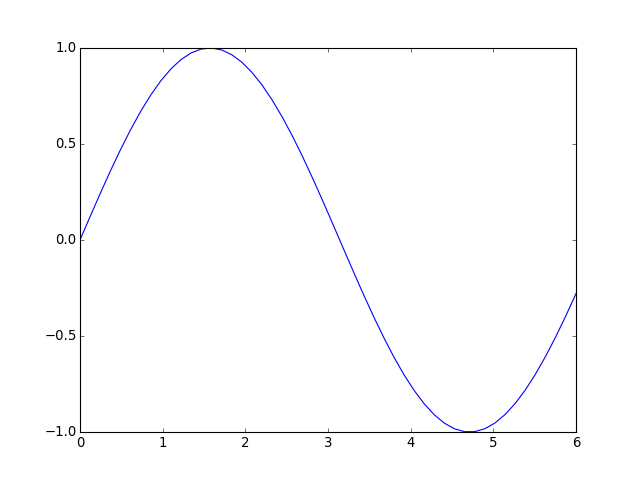

In [18]:
plt.figure()
x = np.linspace(0, 6, 50)
y = np.sin(x)
plt.plot(x, y)


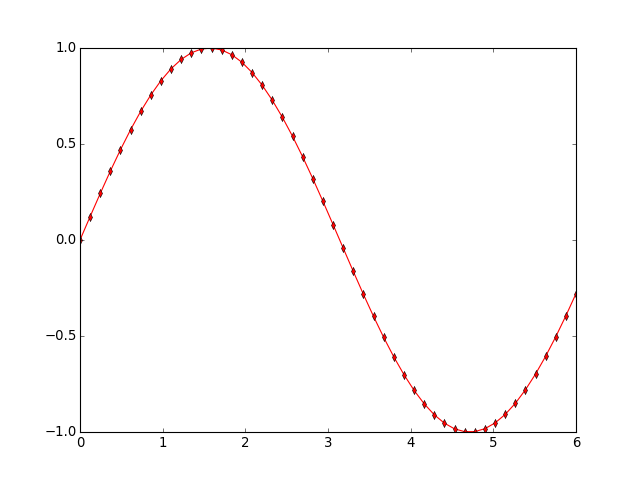

In [19]:
plt.figure()
plt.plot(x, y, 'r', markersize=5, marker='d')
#plt.plot(x, y, 'r-d', markersize=5)


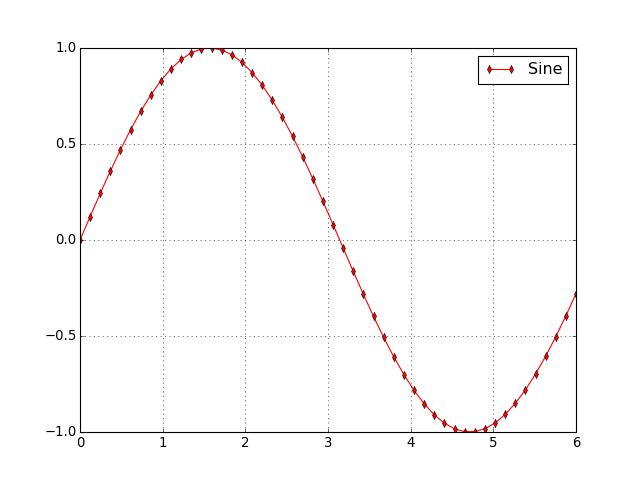

In [20]:
plt.figure()
plt.plot(x, y, 'r', markersize=5, marker='d',
         label="Sine")
plt.legend(loc='best')
plt.grid()

## Simple Plotting II

Try to recreate the following plot:
<img src=pics/simple_plotting_2.svg width=600> </img>
*Helpful functions:* ``plt.fill``, ``plt.fill between``

### Solution

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


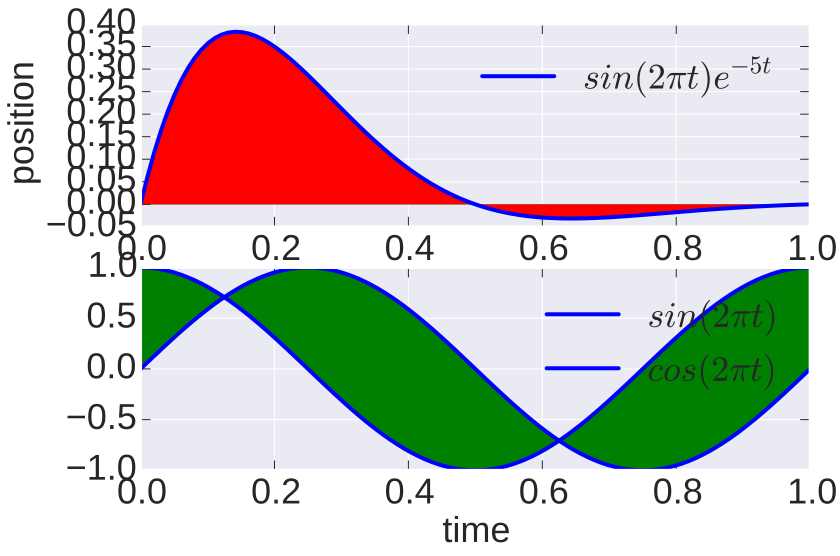

In [1]:
t = np.linspace(0.0, 1.0, 100)
s = np.sin(2*np.pi * t)

plt.figure()

plt.subplot(2,1,1)
plt.plot(t, s * np.exp(-5*t), 'b',
         label=r'$sin (2\pi t) e^{-5 t}$', linewidth=4.)
plt.fill(t, s * np.exp(-5*t), 'r')
plt.xlabel('time')
plt.ylabel('position')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t, np.sin(2.*np.pi*t), 'b', label= r'$sin (2\pi t)$', linewidth=4.)
plt.plot(t, np.cos(2.*np.pi*t), 'b', label= r'$cos (2\pi t)$', linewidth=4.)
plt.fill_between(t, np.cos(2.*np.pi * t) , np.sin(2.*np.pi * t), color='green')
plt.xlabel('time')
plt.legend()
plt.grid(True)

#plt.savefig('pics/simple_plotting_2.svg')

## Image reading
Often one needs to reduce the size of a digital image by *downsampling*: i.e. only choose a smaller number of pixels from an image.

Downsample the image 'bricks.jpg' by selecting every 2nd or 3rd pixel along each axis (x and y). 

Are there any surprising artefacts in the resulting image?

In [3]:
d = plt.imread('../exercises/images/bricks.jpg')
plt.grid('off')
plt.imshow(d)

### Solution

In [4]:
plt.imshow(d[::3, ::3])

Check  out [Moire patterns](https://en.wikipedia.org/wiki/Moir%C3%A9_pattern) for explanation. 

# Simple Tasks

## Polynomial Fitting

1. Generate data by a polynomial function $f(x) = -3x^3 + 2x - 8$
2. Fit a polynomial (``np.polyfit()``) and recover the coefficients of the polynomial.
3. Try the same procedure with noisy data. (use np.random.randn() to add noise to the data)

### Solution


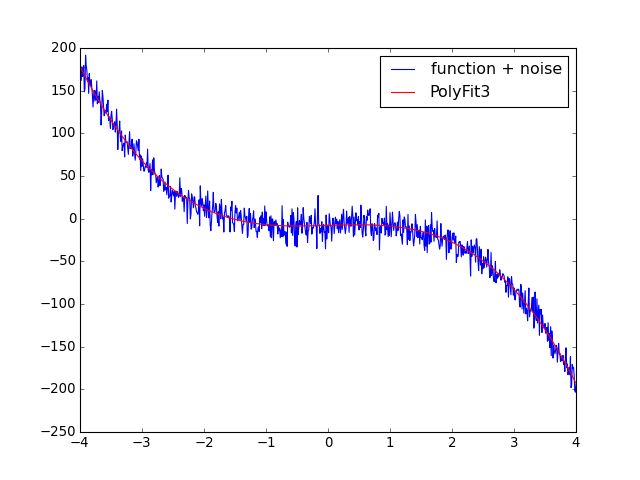

[ -3.00000000e+00  -2.79991613e-16   2.00000000e+00  -8.00000000e+00]


In [22]:
plt.figure()

x = np.linspace(-4, 4, 801)
y = -3.*x**3 + 2.*x - 8

# Fit the polynomial of order 3:
print(np.polyfit(x, y, 3))

# Gaussian noise of variance 10 added to the function
noise = np.random.randn(len(y)) * 10
y += noise

coeff = np.polyfit(x, y, 3)
plt.plot(x, y, label = 'function + noise')
y_fit = coeff[0]*x**3 + coeff[1]*x**2 + coeff[2]*x + coeff[3]
plt.plot(x, y_fit, label='PolyFit3', color='red')
plt.legend()

## Nonlinear Fitting

1. Define the function $f(x) = e^{-ax} + b$
2. Generate noisy data from that function with parameters $a = 2$, $b = 1.4$
3. Make a simple plot of the data
4. Use ``scipy.optimize.curve_fit()`` to estimate a and b from the data and plot the results.

## Solution


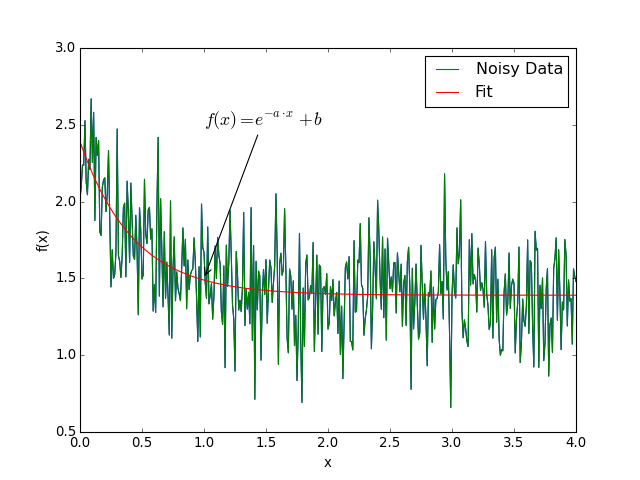

[ 2.32054715  1.3905509 ]


In [23]:
from scipy import optimize as opt

plt.figure()

# define a lambda function with three arguments
f = lambda x, a, b: np.exp(-a*x) + b

x = np.linspace(0, 4, 401)
# generate y values from the lambda function
y = f(x, 2.5, 1.4)
# Add Gaussian noise to them
y += np.random.normal(scale=0.25, size=y.shape)

plt.plot(x, y)

# Note that providing an initial guess `p0` can often be
# vital for fast and correct convergence!
# Also providing the Jacobian can improve the convergence
# dramatically (`Dfun` keyword argument). And sometimes just
# reformulating the parameters, i.e. scaling them or making
# sure that they are as orthogonal as possible helps a lot.
popt, pcov = opt.curve_fit(f, x, y)
print(popt)

plt.plot(x, y, label='Noisy Data')

plt.plot(x, f(x, *popt), label='Fit', color='r')

plt.annotate(
    '$f(x) = e^{-a \cdot x} + b$', size=16, 
    xy=(1, 1.5), xycoords='data', xytext=(1, 2.5),
    textcoords='data', arrowprops=dict(arrowstyle="->"))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Integration

1. Define the function $f(x) = {e^{-(x+3)}}^2$. Make sure the function also accepts lists/array-likes.
3. Calculate the integral $\int_{-20}^{20} f(x)\ dx$ by hand using Riemann sums.
4. Use ``scipy.integrate.quad()`` to evaluate the integral.
5. Try to calculate $\int_1^{\infty} \frac{1}{x^2}\ dx$ and $\int_1^{\infty} \frac{1}{x}\ dx$

### Solution

In [24]:
def f(x):
    # Make sure x is an array. Do *not* use np.vectorize.
    x = np.asarray(x)
    return np.exp(-(x + 3)**2)

def riemann(func, start, stop, steps):
    """Calculates the Riemann sum for a given function
    
    Parameters
    ----------
    func : callable
        Function taking a single array of values
    start : float
        Integral lower bound
    stop : float
        Integral upper bound
    steps : integer
        Number of steps to use (precision)
    
    Returns
    -------
    riemann_sum : float
    """
    x, step = np.linspace(start, stop, steps, retstep=True)
    
    y = func(x)
    integral = step * y.sum()
    return integral

# Calculate the Riemann sum for various number of steps for
# the function "f"
for steps in [41, 401, 4001]:
    integral = riemann(f, -20, 20, steps)
    print("Rieman sum using {} steps {:1.12g}:".format(steps, integral))
    
    
# Now Calculate it using scipy.integrate.quad
from scipy.integrate import quad

integral, estimated_error = quad(f, -20, 20)
print()
print("Result using quad: {:1.12g}".format(integral))

# And integrate the other two examples:
print()
with warnings.catch_warnings():
    # This warnings code, is just to show the warning every time..
    warnings.simplefilter("always")
    integral, estimated_error = quad(lambda x: 1/x**2, 1, np.inf)
print("Integrate 1/x^2 from 1 to infinity: {:1.12g}".format(integral))

print()
with warnings.catch_warnings():
    # This warnings code, is just to show the warning every time....
    warnings.simplefilter("always")
    integral, estimated_error = quad(lambda x: 1/x, 1, np.inf)

print("Integrate 1/x from 1 to infinity: {:1.12g}".format(integral))
print("Note the warning:")


Rieman sum using 41 steps 1.77263720483:
Rieman sum using 401 steps 1.77245385091:
Rieman sum using 4001 steps 1.77245385091:

Result using quad: 1.77245385091

Integrate 1/x^2 from 1 to infinity: 1

Integrate 1/x from 1 to infinity: 40.9960128192
Note the warning:


/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:321: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


## Solving Systems of Linear Equations

You find three shopping bags with following content:

* bag A: 10 kg apples, 5 kg pears, 1 kg oranges (35.35 EUR)
* bag B: 1 kg apples, 8 kg pears, 1 kg oranges (24.91 EUR)
* bag C: 9 kg apples, 3 kg pears, 5 kg oranges (40.38 EUR)

Determine the price of apples, oranges and pears:
1. Formulate a linear system of equations describing the shopping bags.
2. Use ``scipy.linalg.solve()`` (or ``numpy.linalg``) to solve the system of equations.
3. Verify the results by using ``np.dot()``.

### Solution

In [25]:
from scipy.linalg import solve

fruits = np.array([[10, 5, 1], [1, 8, 1], [9, 3, 5]])
total_prices = np.array([35.35, 24.91, 40.38])

# Solve the system of linear equations
# total_prices = fruits * single_prices for single_prices
single_prices = solve(fruits, total_prices)
print("The single prices are:")
print("apples: {}".format(single_prices[0]))
print("pears: {}".format(single_prices[1]))
print("oranges: {}".format(single_prices[2]))

# Make sure the result is correct. Note that due to how
# floating points works, the result is only almost correct.
print("The found prices fit to the real prices:")
print(np.allclose(np.dot(fruits, single_prices), total_prices))

The single prices are:
apples: 1.9899999999999998
pears: 2.49
oranges: 3.0
The found prices fit to the real prices:
True


## Some Linear Algebra

1. Create a random matrix, where the entries are randomly chosen from a standard
normal (Gaussian) distribution.
2. Plot the (complex!) eigenvalues of that matrix, add labels to the axis and a
legend.
3. Add a title for your plot and make it red and increase the size.
4. Store your graph as an ``.pdf``. It should look something like this:
    <img src="pics/matrix1.svg">

5. Define a function that returns True if a point (x, y) is contained in a circle of
radius r around the origin. Make sure it works for array inputs.
6. Define a function to find the smallest circle containing all the eigenvalues of your
matrix.
7. Plot the eigenvalues for a matrix of size N = 50, 100, 200, 500 together with the
smallest disc containing the eigenvalues. Therefore first import the matplotlib
module ``matplotlib.patch`` and have a look at the classes contained in that mod-
ule. Having identified a suitable class create a patch (a circle) and try to add it
to your plot. (*Hint:* Patches can be added to axes objects)
    <img src="pics/matrix2.svg">

In [34]:
from scipy.linalg import eigvals


def geteig(n):
    """Get eigenvalues for a random nxn matrix.
    """
    m = np.random.normal(size=(n, n))
    return eigvals(m)

M = geteig(1000)

plt.figure()
plt.plot(M.real, M.imag, 'ko', markersize=5, label=r'$N = 1000$')
title_text = plt.title('Eigenvalues of a random matrix')
title_text.set_fontsize(24)
title_text.set_color('red')

plt.xlabel('real part')
plt.ylabel('imag part')
plt.legend()
#plt.savefig('pics/matrix1.pdf')

def is_inside_circle(x, y, radius):
    # Squaring the radius instead of the x and y.
    return x**2 + y**2 < r**2

def minimum_radius(m):
    """Get the minimum "radius" including all complex values
    inside m.
    """
    # We could also calculate m.real()**2 + m.imag()**2
    # other versions may be faster.
    return abs(m).max()


# Create a clean figure:
fig = plt.figure()

graph = fig.add_subplot(1, 1, 1)

Ns = [200, 500, 1000][::-1]
colors = ['yellow', 'green', 'black', 'yellow', 'black']
for i in range(len(Ns)):
    M = geteig(Ns[i]) 
    r = minimum_radius(M)
    graph.plot(M.real, M.imag, 'o', color = colors[i] , markersize=5,
               label='$N = {}$'.format(Ns[i]))
    circ = plt.Circle((0,0), r, color=colors[i], alpha=0.3)
    graph.add_patch(circ)

plt.legend()
#plt.savefig('pics/matrix2.pdf')

## Basic Statistics

1. Define a 1D Gaussian probability density function with $\mu = 10$ and $\sigma = 5$ using the formula
   $$\frac{1}{\sqrt{2\pi} \cdot \sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2} \right)$$
2. Confirm that the integral of this function is approximatly 1.
3. Instead of defining the distribution yourself, now use *only* ``scipy.stats.norm`` to:
   1. Draw 1000 samples. And plot a histogram using matplotlib.
   2. Do a maximum likelyhood estimation to find the parameters of the gaussian
   from the random samples.
   (For a gaussian these are just the mean and standard deviation, but use
    ``scipy.stats.norm`` instead of calculating these yourself)
   3. Add both the estimated and the real Gaussian to the plot. If the histogram is not normed correctly already,
   norm it to fit the lines (see the histogram documentation).
   4. Find the points that include 90% around the mean in the original distribution.
   And confirm that these include 90% using both the comulative distribution function (``cdf``) and the original integration method.

### Solution

In [35]:
from scipy.stats import norm
from scipy.integrate import quad

plt.figure()

def gaussian_pdf(x, mu=10, sigma=5):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(x-mu)**2/(2*sigma**2))

integral, _ = quad(gaussian_pdf, -np.inf, np.inf)
print("The overall integral is about:", integral)

# Actuall do this with scipy.stats.norm:
orig_gaussian = norm(loc=10, scale=5)
random_draws = orig_gaussian.rvs(1000)
# Or:
# random_draws = norm.rvs(loc=10, scale=5, size=1000)

plt.hist(random_draws, bins=20, label='histogram', normed=True)

# Try to find the parameters:
mu, sigma = norm.fit(random_draws)
print("The estimated parameters are mu={}, sigma={}".format(mu, sigma))

x = np.linspace(random_draws.min(), random_draws.max(), 400)
plt.plot(x, orig_gaussian.pdf(x), label='original')
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma), label='fit')
plt.ylabel("Propability")
plt.grid()
plt.legend()

# Find the 90th percentile:
lower_bound, upper_bound = orig_gaussian.interval(0.9)

print()
print("The lower and upper bounds are: {} and {}".format(lower_bound, upper_bound))
cdf_bounds = orig_gaussian.cdf(upper_bound) - orig_gaussian.cdf(lower_bound)
print("The cdf says {} are between these bounds.".format(cdf_bounds))
cdf_integral, _ = quad(gaussian_pdf, lower_bound, upper_bound)
print("The first integral method finds: {}".format(cdf_integral))

## Power Spectrum Analaysis

A way to look at a signal is to view its spectral density (i.e., the Fourier transform of
the signal). The Fourier transform views the signal as a whole. It swaps the dimension
of time with the dimension of frequency. One can think of the Fourier transform as a
combination of slow and fast oscillations with different amplitude. A very strong and
slow component in the frequency domain implies that there is a high correlation between
the large-scale pieces of the signal in time (macro-structures), while a very strong and
fast oscillation implies correlation in the micro-structures. Therefore, if our signal $f(t)$
represents values in every single moment of time, its Fourier transform $F(\omega)$ represents
the strength of every oscillation in a holistic way in that chunk of Z time. These two
signals are related to each other by the following formula:
$$ F(\omega) = \int_{-\infty}^\infty f(t) e^{-i\omega t} $$

For simplicity, in the following we will consider a signal that is constructed by summing
different sine waves and try to get information about the underlying frequencies.

1. Construct a 20 seconds long signal samples at 1kHz by adding 20 sine waves with a
   frequency randomly choosen from the interval [1Hz, 300Hz] (no phase shift is necessary).
   Add some gaussian noise to the signal.
2. Plot the signal in the interval t = 0, ..., 2s.
3. Use numpy to calculate the one-dimensional discrete Fourier Transform.
4. The square of the absolute value of the fourier transform gives you the power
   carried by each frequency (power spectrum). To calculate the Fourier transform
   sample frequencies you can also use a numpy function - have a look at the documentation
   of the ``numpy.fft`` module. Plot the power spectrum logarithmically
   and also indicate the frequencies that were used for generating the data.
5. *** Add a plot of the original time series to the plot of the power spectrum. To
   generate the subplot you can add an axes object directly to the figure. If you
   don’t know how to do that have a look at the documentation of matplotlib or the
   examples in the gallery (http://matplotlib.sourceforge.net/gallery.html).***

### Solution


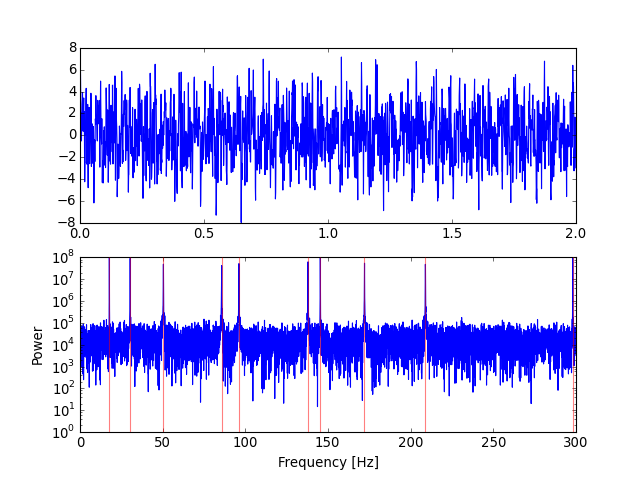

In [28]:
sampleing_freq = 1/1000

times = np.linspace(0, 20, 20*1000+1)

freqs = np.random.uniform(1, 300, size=10)

# Construct the signal
y = np.zeros_like(times)
# Could use broadcasting, but lets not overdo it:
for freq in freqs:
    y += np.sin(2*np.pi * freq * times)

y += np.random.normal(size=y.shape)

# Plot the data on top:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(times[:2000], y[:2000], label='Signal')

# Find the power spectrum. We can use rfft since the data is purely real.
# (For those who have ever need speed critical FFT. First you can use
# padding, and also there are much faster FFTs that numpy cannot wrap
# easily for legal reasons.)
power = abs(np.fft.rfft(y)**2)
frequencies = np.fft.rfftfreq(len(y), d=sampleing_freq)

plt.subplot(2, 1, 2)
plt.semilogy(frequencies, power)
plt.xlim(0, 300)  # Only the interesting range

plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

plt.vlines(freqs, plt.ylim()[0], plt.ylim()[1], color='r', zorder=3, alpha=0.5)

## Vectorization of a Monte-Carlo Simulation

Recall the dice-simulation from the basic-exercise sheet. The goal of the current exercise
is to optimize this program using vectorization.

1. Create a function that draws N-times two uniform random integers from 1 to 6 and
counts how many times X at least one of the two takes the value 6. Do this in a
single N × 2 matrix.
2. Run this simulation for growing N and plot the estimated probability as a function
of N. Try to use linear and logarithmic axis. Include the exact value of 11/36.
3. Repeat the dice throwing Z times for a fixed value of N and plot a histogram of
the number of throws with at least one six (e.g. for N = 1000, Z = 10000).
The data are integers, so choose a bin width of 1 or use integer functions such as `np.bincount`.
Further print out the mean value and the standard deviation.
5. As above repeat the dice throwing for a fixed number N of dice throws Z times
and calculate the probability to get at least one six with the two dices. From this
data you can calculate the empirical average and standard deviation for every
pair of N and Z. Make an error-bar plot for N = 1, . . . , 20 and Z = 5000.

### Solution


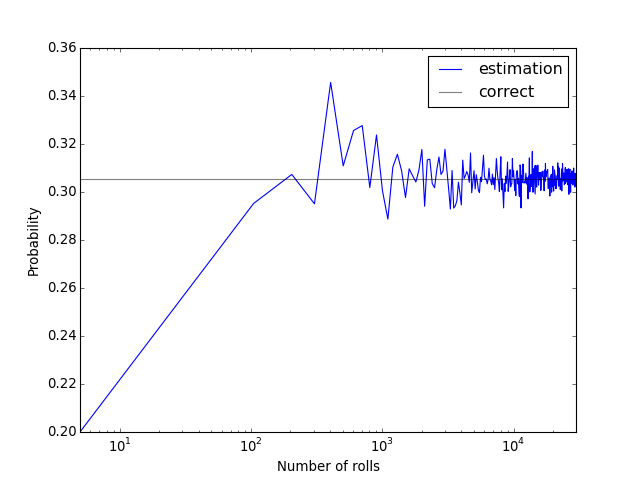


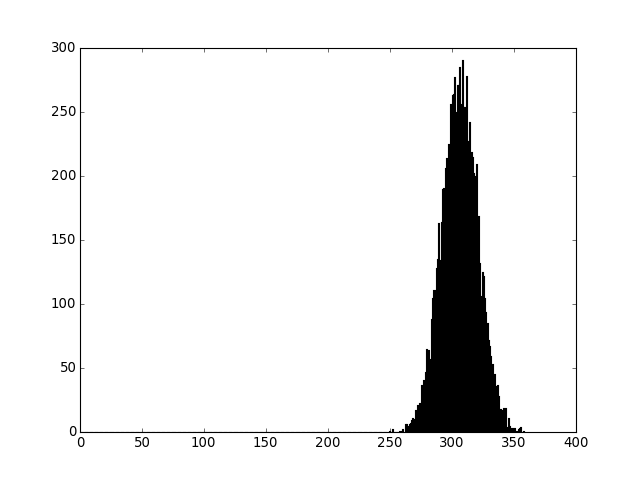

Mean: 305.5336
Standard deviation: 14.6097712365



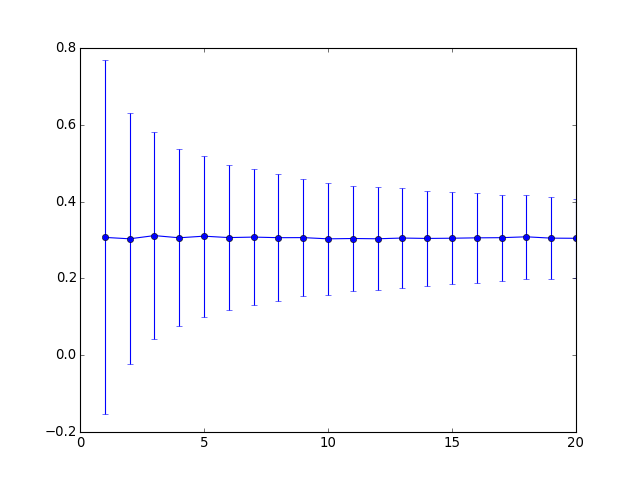

<Container object of 3 artists>

In [29]:
# 1.
def count_dice(N):
    dice = np.random.randint(1, 7, size=(N, 2))
    equal_6 = dice == 6
    one_is_6 = equal_6.any(-1)
    count = np.count_nonzero(one_is_6)
    return count

# 2.
Ns = np.arange(5, 30000, 100)
# We do not vectorize this part. Since N varies, it is not easy/possible.
# If N is small the whole thing will be much faster implemented i.e. in C
# or Cython. Tricks could be used in this example, but I consider them
# highly non-basic.
count = [count_dice(N) for N in Ns]
count = np.asarray(count)
probs = count / Ns

plt.figure()

plt.semilogx(Ns, probs, label='estimation')
plt.hlines(11/36, Ns[0], Ns[-1], label='correct', zorder=3, alpha=0.5)
plt.xlim(Ns[0], Ns[-1])
plt.legend(loc='best')
plt.ylabel('Probability')
plt.xlabel('Number of rolls')

# 3.
def repeat_count_dice(Z, N):
    """Repeat dice throwing Z times.
    Note that if Z and N is very large it may be better
    to loop in python to avoid high memory usage.
    If N is very large (probably above 10000 but not I did
    not time) the difference will be neglegible.
    """
    dice = np.random.randint(1, 7, size=(Z, N, 2))
    equal_6 = dice == 6
    one_is_6 = equal_6.any(-1)
    # Unfortunatly count_nonzero does not support the axis paramter
    # at this time (but it can be much faster in new versions)
    count = np.sum(one_is_6, axis=-1)
    return count

counts = repeat_count_dice(10000, 1000)
# This function counts how often each result occurred
# specifically for integers:
binned = np.bincount(counts)
plt.figure()
plt.bar(np.arange(len(binned)), binned)

print("Mean:", counts.mean())
print("Standard deviation:", counts.std(ddof=1))

# 4.
Ns = np.arange(1, 21)
means = np.empty(len(Ns))
stds = np.empty(len(Ns))

for i, N in enumerate(Ns):
    counts = repeat_count_dice(5000, N) / N
    means[i] = counts.mean()
    stds[i] = counts.std(ddof=1)
    
plt.figure()
plt.errorbar(Ns, means, stds, marker='o')

# Integration

## Lotka-Volterra System

Consider the Lotka-Volterra equation of predator-prey interactions
$$
\frac{\text{d}N_1}{\text{d}t} = N_1 \cdot (\varepsilon_1 - \gamma_1 N_2), \\
\frac{\text{d}N_2}{\text{d}t} = -N_2 \cdot (\varepsilon_2 - \gamma_2 N_1)
$$
This is a system of ordinary differential equations, where $N_1(t)$ is the number of preys
and $N_2(t)$ the number of predators. $\varepsilon_1, \varepsilon_2, \gamma_1, \gamma_2$ are parameters representing the growth
and interaction between preys and predators.

  1. Find the fixed points of the system for the parameters $\varepsilon_1=1.0, \varepsilon_2=1.5, \gamma_1=0.1, \gamma_2=0.075$.
     * Define a function that returns the growing rates $\frac{\text{d}N_1}{\text{d}t}$ and $\frac{\text{d}N_2}{\text{d}t}$
       in an array. In the second part of the exercise, we will use `scipy.integrate.odeint()` to
       obtain the solution of the ODE system. Therefore, choose the parameters of
       your function accordingly, $f = f(N, t, \dots)$.
     * Use `scipy.optimize.fsolve` to find the fixed points of the system.
  2. Solve the system of equations for the following initial conditions $N_1(0) = 10,\ N_2(0) = 5$.
     * Define a vector containing the time steps of the integration and one for the initial conditions.
     * Solve the system using `scipy.integrate.odeint()`
     * Lower the precision of the integrator until you see a difference after many periods. The integrator
       has multiple options for precision control. Also the number of steps can have an effect on the result.
  3. *Bonus (no solution)*: Also try `scipy.integrate.ode` which provides different integrators but requires manual looping
     (this is not a big speed issue, integrating in python is pretty slow in any case).
   

### Solution

Growth rates for the initial values N1 = 10 and N2 = 5
Parameters are eps1 = 1, gamma1 = 0.1, eps2 = 1.5, gamma2 = 0.075
[ 5.   -3.75]

Fixed points of the system:
[ 0.  0.]
[ 20.  10.]

Growth rates of the fixed points
[ 0. -0.]
[ 0. -0.]

Total number of function evaluations
Normal precision: 3471
Low precision: 706



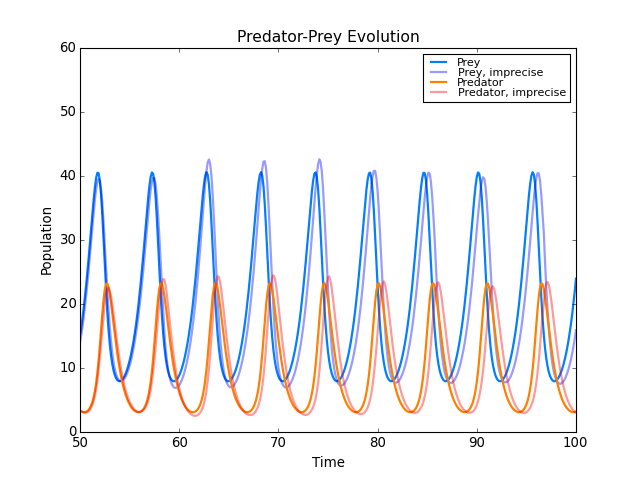

In [30]:
import scipy.optimize as opt
from scipy import integrate


def dN_dt(N, t0, eps1, gamma1, eps2, gamma2):
    """Growth rates of the Lotka-Volterra equations:
    """
    dN1_dt = N[0] * (eps1 - gamma1*N[1])
    dN2_dt = -N[1] * (eps2 - gamma2*N[0])
    return np.array([dN1_dt, dN2_dt])

# Return the growth rates for the initial conditions
print('Growth rates for the initial values N1 = 10 and N2 = 5')
print('Parameters are eps1 = 1, gamma1 = 0.1, eps2 = 1.5, gamma2 = 0.075')
print(dN_dt([10., 5.], 0., 1., 0.1, 1.5, 0.075))

# Find the fixed points by searching for stable solutions.
# Try different inital values of N1 and N2 (x0 = [N1, N2]).
print()
print('Fixed points of the system:')
print(opt.fsolve(dN_dt, x0=[0, 0], args=(0, 1.0, 0.1, 1.5, 0.075)))
print(opt.fsolve(dN_dt, x0=[10, 10], args=(0, 1.0, 0.1, 1.5, 0.075)))

# Check the fixed points. Zero growth rate means that the solution is stable.
print()
print('Growth rates of the fixed points')
print(dN_dt([0., 0.], 0., 1.0, 0.1, 1.5, 0.075))
print(dN_dt([20., 10.], 0., 1.0, 0.1, 1.5, 0.075))

# Solve the system of ODEs by integrating with scipy.integrate.odeint
# First determine time resolution and start values.
times = np.linspace(0, 100, 801)
N_0 = np.array([10, 5])

# Then solve the system for different time resolution.
sol1, info1 = integrate.odeint(dN_dt, N_0, times, args=(1.0, 0.1, 1.5, 0.075),
                              full_output=True)
# Decrease atol and rtol a lot. For more complex systems (or even chaotic ones)
# you will see differences much earlier. The time steps themselves also have
# some influence on the integration precision.
sol2, info2 = integrate.odeint(dN_dt, N_0, times, args=(1.0, 0.1, 1.5, 0.075),
                              atol=0.025, rtol=0.025, full_output=True)

print()
print('Total number of function evaluations')
print('Normal precision:', info1['nfe'][-1])
print('Low precision:', info2['nfe'][-1])

# Compare the two solutions in a plot.
plt.figure()

plt.plot(times, sol1[:, 0], label='Prey', color=[0, 0.5, 1], linewidth=2)
plt.plot(times, sol2[:, 0], label='Prey, imprecise', color='b', linewidth=2, alpha=0.4)
plt.plot(times, sol1[:, 1], label='Predator', color=[1, 0.5, 0], linewidth=2)
plt.plot(times, sol2[:, 1], label='Predator, imprecise', color='r', linewidth=2, alpha=0.4)
# Start at time=50
plt.axis([50, 100, 0, 60])
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Evolution', size=14)
plt.legend(loc='best', prop={'size':10}, labelspacing=0)
